In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [3]:
df[['total_sulfur_dioxide', 'is_red']]

,total_sulfur_dioxide,is_red
0,34.0,1.0
1,67.0,1.0
2,54.0,1.0
3,60.0,1.0
4,34.0,1.0
5,40.0,1.0
6,59.0,1.0
7,21.0,1.0
8,18.0,1.0
9,102.0,1.0


In [4]:
df.is_red.isnull().any()

False

In [5]:
y = df.is_red
X = df.total_sulfur_dioxide.reshape(-1, 1)
logit = LogisticRegression()

In [6]:
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
predictions = logit.predict(X)
predictions[0:5]

array([ 1.,  1.,  1.,  1.,  1.])

In [8]:
predictions = logit.predict_proba(X)
predictions[0:5]

array([[ 0.09664386,  0.90335614],
       [ 0.45178559,  0.54821441],
       [ 0.26938689,  0.73061311],
       [ 0.34829758,  0.65170242],
       [ 0.09664386,  0.90335614]])

In [9]:
X = df[['total_sulfur_dioxide', 'pH']]
y = df.is_red

In [10]:
model2 = logit.fit(X, y)
model2.score(X, y)

0.93073726335231644

In [11]:
predictions = model2.predict(X)
predictions[0:5]

array([ 1.,  1.,  1.,  1.,  1.])

In [12]:
predictions = model2.predict_proba(X)
predictions[0:5]

array([[ 0.04572322,  0.95427678],
       [ 0.47447913,  0.52552087],
       [ 0.25300094,  0.74699906],
       [ 0.3953048 ,  0.6046952 ],
       [ 0.04572322,  0.95427678]])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

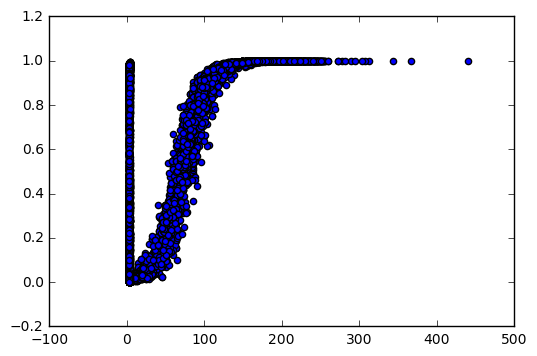

In [17]:
plt.scatter(X, predictions)